## Requierments

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install librosa
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Libraries

In [ ]:
import os
from os import listdir
from os.path import isfile, join
import shutil

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import minmax_scale

import librosa
import librosa.display

In [ ]:
from numpy import unique
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA  # to apply PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Clustering

In [ ]:
frqPath = '/content/drive/MyDrive/ML Pro/freqFeatures.csv'
frq = pd.read_csv(frqPath)
frq.head()

f1            f2           f3             f4         f5  \
0  2584.996392  63693.030984  5290.997782  273864.333286  22.488743   
1  2528.561939  64760.705174  5093.851565  245615.897472  22.489827   
2  2617.488851  42081.244012  5229.383344  145713.167611  22.427768   
3  2622.603157  41363.450556  5265.330304  179297.857014  22.542826   
4  2570.854645  53988.009636  5156.315340  237995.151944  22.657846   

          f6         f7         f8         f9        f10  ...        f75  \
0  14.113292  17.383029  18.158326  18.928139  19.112233  ...  47.370861   
1  14.327634  17.905462  17.858384  19.473049  20.000149  ...  22.597775   
2  14.192465  18.215217  17.717046  20.124068  20.289233  ...  28.235800   
3  14.510391  18.353993  18.207540  20.457797  20.709320  ...  39.138004   
4  13.823885  18.186840  18.344408  20.538640  21.691582  ...  38.597340   

         f76        f77        f78        f79        f80        f81  \
0  31.019192  33.702049  36.208076  34.007050  29.383377  46.341492   
1  32.457108  29.216520  42.320858  30.005566  30.675198  28.291052   
2  46.998127  32.896488  31.628038  22.395727  29.788387  22.087563   
3  52.604408  55.641155  34.916023  27.168413  27.409687  30.605696   
4  47.665012  68.244507  37.569969  27.222820  30.998123  39.749107   

         f82  instrument  dastgah  
0  56.387363           5        0  
1  29.075520           5        0  
2  34.713612           5        0  
3  51.600712           5        0  
4  38.485241           5        0  

[5 rows x 84 columns]

In [ ]:
frq.isnull().sum()

f1            0
f2            0
f3            0
f4            0
f5            0
             ..
f80           0
f81           0
f82           0
instrument    0
dastgah       0
Length: 84, dtype: int64

In [ ]:
domPath = '/content/drive/MyDrive/ML Pro/timeFeatures.csv'
dom =  pd.read_csv(domPath)
dom.head()

f1        f2        f3        f4        f5        f6        f7  \
0  63288  0.239438  0.262608  0.262608  0.262608  0.262608  0.240708   
1  63884  0.315155  0.328134  0.328134  0.328134  0.328134  0.291756   
2  68294  0.297347  0.263690  0.291265  0.291265  0.341047  0.341047   
3  67865  0.294037  0.301608  0.316878  0.478922  0.478922  0.478922   
4  67364  0.320645  0.320645  0.320645  0.342221  0.342221  0.342221   

         f8        f9       f10  ...        f372         f373         f374  \
0  0.202006  0.274087  0.342933  ...  275.430709   614.400647  5702.916268   
1  0.295456  0.345083  0.345083  ...  401.383240  1062.628767  -310.305124   
2  0.497550  0.497550  0.497550  ... -506.298813  -486.533070  -720.316060   
3  0.478922  0.427562  0.427562  ... -662.091090  -471.373758  -432.574367   
4  0.342221  0.295128  0.238177  ...  -65.105011   428.829395   333.516078   

          f375         f376        f377        f378        f379  instrument  \
0 -1187.746010  -155.950518 -104.686759  -67.353613  -59.351011           5   
1  -159.253113   -59.514595  -58.342699  -31.909262  -22.717273           5   
2  2623.077203 -2198.183293  249.061473  184.183200 -507.852002           5   
3  -171.877662  -189.552338 -184.646114 -119.507398  -10.744464           5   
4  -368.567849  -240.246077  100.991704  611.615949   66.182637           5   

   dastgah  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 381 columns]

In [ ]:
dom.isnull().sum()

f1             0
f2             0
f3             0
f4             0
f5             0
              ..
f377          12
f378          13
f379          15
instrument     0
dastgah        0
Length: 381, dtype: int64

## fixed missing values

In [ ]:
print(frq.groupby(['dastgah'])['dastgah'].count())

dastgah
0    1036
1    1033
2    1219
3    1178
4     977
5    1256
6    1053
Name: dastgah, dtype: int64


In [ ]:
newDom = dom.dropna()

In [ ]:
def run_plot(grby, numOfcluster ):
  keys = ['0 shur', '1 segah', '2 Mahur', '3 Homayun', '4 Rast-Panjgah',  '5 Nava', '6 Chahargah']
  
  # define Seaborn color palette to use
  palette_color = seaborn.color_palette('bright')
    
  # plotting data on chart
  plt.pie(gb[1], labels=keys, colors=palette_color, autopct='%.0f%%')
  
  if numOfcluster == 2:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    fig.suptitle('Initial Pokemon - 1st Generation')

    # Bulbasaur
    sns.barplot(ax=axes[0], x=grby[0], y=bulbasaur.values)
    axes[0].set_title(bulbasaur.name)

    # Charmander
    sns.barplot(ax=axes[1], x=charmander.index, y=charmander.values)
    axes[1].set_title(charmander.name)

    # Squirtle
    sns.barplot(ax=axes[2], x=squirtle.index, y=squirtle.values)
    axes[2].set_title(squirtle.name)


In [ ]:
def run_cluster(func, df, numClass, PCA_b, n_components = 2, label = 'dastgah' ):
  
  y = df[label]
  X = df

  le = LabelEncoder()

  X[label] = le.fit_transform(X[label])

  y = le.transform(y)
  cols = X.columns

  ms = StandardScaler()
  X = ms.fit_transform(X)
  X = pd.DataFrame(X, columns=[cols])
  X = X.drop([label], axis=1)
 
  keys = ['0 shur', '1 segah', '2 Mahur', '3 Homayun', '4 Rast-Panjgah',  '5 Nava', '6 Chahargah']

  if PCA_b:
    pca = PCA(n_components = n_components)
    pca.fit(X)
    X = pca.transform(X)
    X = pd.DataFrame(X)

  if func == "KMeans":
    kmeans = KMeans(n_clusters = numClass, random_state=0) 
    kmeans.fit(X)

    #kmeans.cluster_centers_
    print("inertia: ",kmeans.inertia_)

    labels = kmeans.labels_

    labels_dataset = pd.DataFrame(labels,columns=['predict'])
    labels_dataset['actual'] = y

    print(labels_dataset.groupby(['predict','actual'])['actual'].count())

    if numClass == 2:
      print("silhouette score: ", silhouette_score(X, labels_dataset['predict'], random_state=2)*100)
      gb = labels_dataset.groupby(['actual','predict']).size().unstack(fill_value=0)
      gb.plot.pie(subplots=True,figsize=(10, 5), autopct='%1.1f%%', labels=keys, legend = False);

    if numClass == 7:
      correct_labels = sum(y == labels)
      print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
      print("silhouette score: ", silhouette_score(X, labels_dataset['predict'], random_state=2)*100)
      gb = labels_dataset.groupby(['actual','predict']).size().unstack(fill_value=0)
      gb.plot.pie(subplots=True,figsize=(7*5, 10), autopct='%1.1f%%', labels=keys, legend = False);

    if numClass == 20:
      print("silhouette score: ", silhouette_score(X, labels_dataset['predict'], random_state=2)*100)
      gb = labels_dataset.groupby(['actual','predict']).size().unstack(fill_value=0)
      gb.plot.pie(subplots=True,figsize=(5*20, 5), autopct='%1.1f%%', labels=keys, legend = False);



  if func == "agg":
    aggl = AgglomerativeClustering(n_clusters = numClass, affinity='euclidean', linkage='ward') 
    aggl.fit_predict(X)


    #print("inertia: ",aggl.inertia_)

    labels = aggl.labels_

    labels_dataset = pd.DataFrame(labels,columns=['predict'])
    labels_dataset['actual'] = y

    print(labels_dataset.groupby(['predict','actual'])['actual'].count())
  
    if numClass == 2:
      print("silhouette score: ", silhouette_score(X, labels_dataset['predict'], random_state=2)*100)
      gb = labels_dataset.groupby(['actual','predict']).size().unstack(fill_value=0)
      gb.plot.pie(subplots=True,figsize=(10, 5), autopct='%1.1f%%', labels=keys, legend = False);

    if numClass == 7:
      correct_labels = sum(y == labels)
      print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
      print("silhouette score: ", silhouette_score(X, labels_dataset['predict'], random_state=2)*100)
      gb = labels_dataset.groupby(['actual','predict']).size().unstack(fill_value=0)
      gb.plot.pie(subplots=True,figsize=(7*5, 5), autopct='%1.1f%%', labels=keys, legend = False);

    if numClass == 20:
      print("silhouette score: ", silhouette_score(X, labels_dataset['predict'], random_state=2)*100)
      gb = labels_dataset.groupby(['actual','predict']).size().unstack(fill_value=0)
      gb.plot.pie(subplots=True,figsize=(5*20, 5), autopct='%1.1f%%', labels=keys, legend = False);




  if func == "GM":
    gm = GaussianMixture(n_components=numClass, random_state=0)  
    gm.fit_predict(X)


    #print("inertia: ",aggl.inertia_)
    labels = gm.predict(X)

    labels_dataset = pd.DataFrame(labels,columns=['predict'])
    labels_dataset['actual'] = y

    print(labels_dataset.groupby(['predict','actual'])['actual'].count())
    

    if numClass == 2:
      print("silhouette score: ", silhouette_score(X, labels_dataset['predict'], random_state=2)*100)
      gb = labels_dataset.groupby(['actual','predict']).size().unstack(fill_value=0)
      gb.plot.pie(subplots=True,figsize=(10, 5), autopct='%1.1f%%', labels=keys, legend = False);

    if numClass == 7:
      correct_labels = sum(y == labels)
      print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
      print("silhouette score: ", silhouette_score(X, labels_dataset['predict'], random_state=2)*100)
      gb = labels_dataset.groupby(['actual','predict']).size().unstack(fill_value=0)
      gb.plot.pie(subplots=True,figsize=(7*5, 5), autopct='%1.1f%%', labels=keys, legend = False);

    if numClass == 20:
      print("silhouette score: ", silhouette_score(X, labels_dataset['predict'], random_state=2)*100)
      gb = labels_dataset.groupby(['actual','predict']).size().unstack(fill_value=0)
      gb.plot.pie(subplots=True,figsize=(5*20, 5), autopct='%1.1f%%', labels=keys, legend = False);

# Kmeans

KMEANS

For frequency features without PCA

2 clusters

inertia:  583896.3741192305
predict  actual
0        0         288
         1         318
         2         395
         3         312
         4         159
         5         297
         6         244
1        0         748
         1         715
         2         824
         3         866
         4         818
         5         959
         6         809
Name: actual, dtype: int64
silhouette score:  16.200255055668826


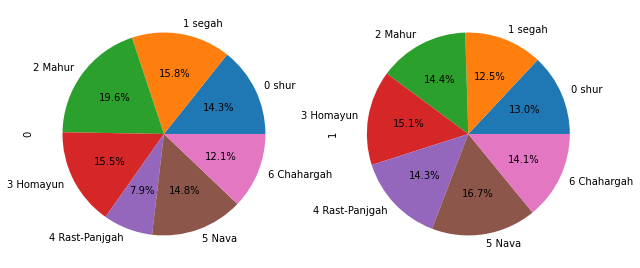

In [ ]:
run_cluster('KMeans', frq, 2, 0, 2, 'dastgah')

KMEANS

For frequency features with PCA

2 clusters

inertia:  85706.55529999975
predict  actual
0        0         720
         1         690
         2         808
         3         846
         4         804
         5         935
         6         796
1        0         316
         1         343
         2         411
         3         332
         4         173
         5         321
         6         257
Name: actual, dtype: int64
silhouette score:  43.4899758253538


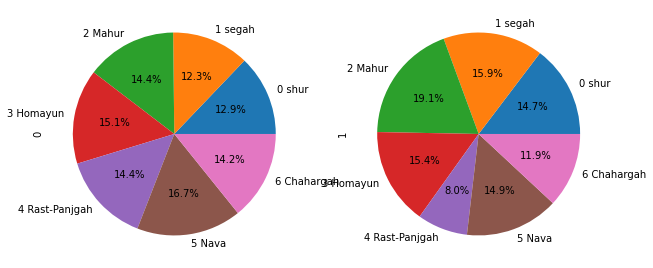

In [ ]:
run_cluster('KMeans', frq, 2, 1, 2, 'dastgah')

KMEANS

For domain features without PCA

2 clusters

inertia:  2328509.3030300746
predict  actual
0        0         652
         1         670
         2         714
         3         742
         4         564
         5         767
         6         601
1        0         368
         1         356
         2         501
         3         428
         4         404
         5         473
         6         439
Name: actual, dtype: int64
silhouette score:  25.335432915239892


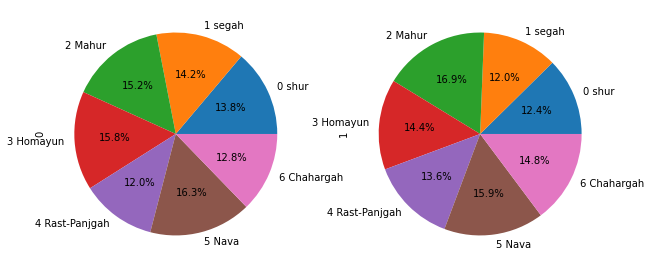

In [ ]:
run_cluster('KMeans', newDom, 2, 0, 2, 'dastgah')

KMEANS

For domain features with PCA

2 clusters

inertia:  529808.7264773578
predict  actual
0        0         653
         1         673
         2         703
         3         740
         4         565
         5         768
         6         596
1        0         367
         1         353
         2         512
         3         430
         4         403
         5         472
         6         444
Name: actual, dtype: int64
silhouette score:  53.36575870958923


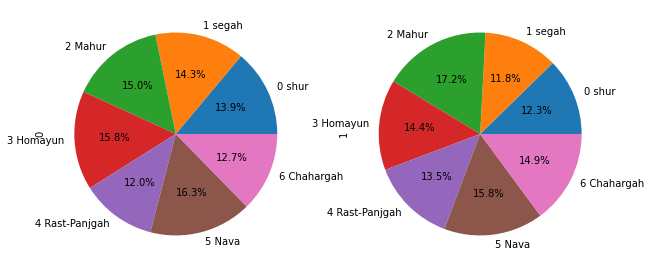

In [ ]:
run_cluster('KMeans', newDom, 2, 1, 2, 'dastgah')

KMEANS

For frequency features without PCA

7 clusters

inertia:  492404.1014951207
predict  actual
0        0          67
         1          61
         2         100
         3          59
         4          42
         5          25
         6          65
1        0          94
         1          81
         2         153
         3         134
         4          90
         5         126
         6         156
2        0         116
         1         135
         2         149
         3         109
         4          54
         5         177
         6         100
3        0         236
         1         215
         2         210
         3         242
         4         216
         5         361
         6         185
4        0         147
         1          81
         2         194
         3         174
         4         114
         5          90
         6         136
5        0         180
         1         242
         2         180
         3         213
         4         126
         5         203
         6   

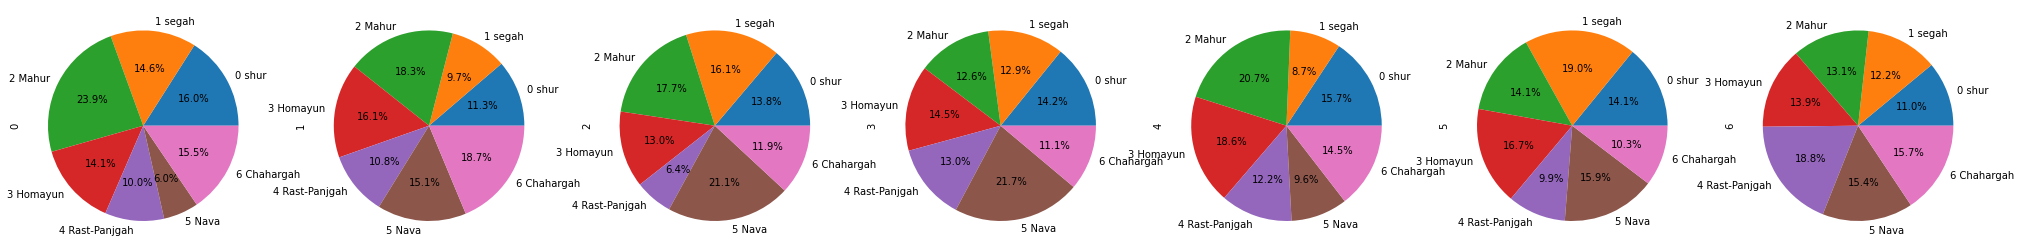

In [ ]:
run_cluster('KMeans', frq, 7, 0, 2, 'dastgah')

KMEANS

For frequency features with PCA

7 clusters

inertia:  27455.58190834421
predict  actual
0        0          56
         1          40
         2          57
         3          34
         4          28
         5          14
         6          43
1        0         129
         1          94
         2         176
         3         192
         4         128
         5         149
         6         246
2        0         115
         1         159
         2         122
         3         126
         4          69
         5         130
         6         107
3        0         236
         1         266
         2         238
         3         263
         4         167
         5         235
         6         168
4        0         214
         1         213
         2         267
         3         221
         4         257
         5         278
         6         235
5        0         204
         1         164
         2         215
         3         235
         4         274
         5         330
         6   

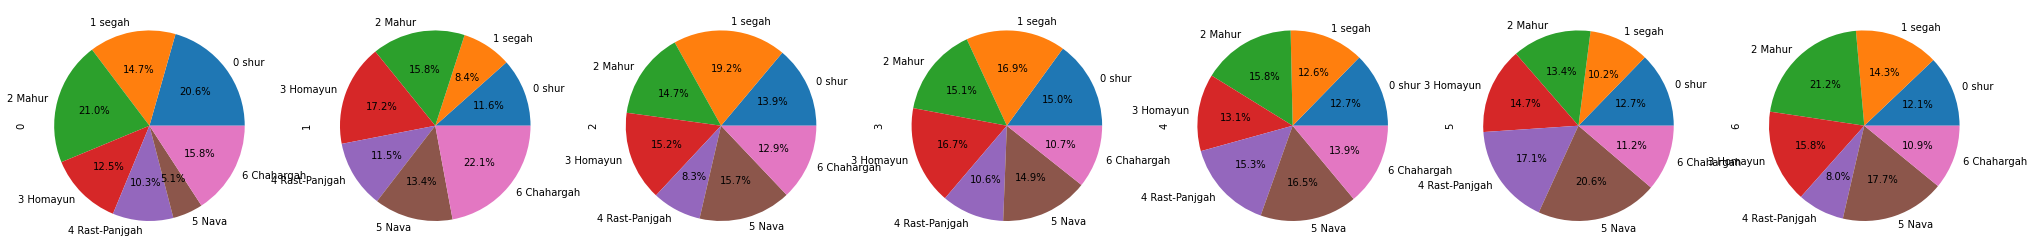

In [ ]:
run_cluster('KMeans', frq, 7, 1, 2, 'dastgah')

KMEANS

For Domain features with PCA

7 clusters

inertia:  1906599.459915324
predict  actual
0        0         228
         1         261
         2         262
         3         327
         4         237
         5         194
         6         269
1        0          11
         2          30
         4          17
2        0          18
         1          11
         2          23
         3          27
         4          21
         5         104
         6          35
3        0         264
         1         216
         2         227
         3         192
         4         233
         5         379
         6         192
4        0          95
         1         137
         2         107
         3         131
         4          80
         5         126
         6         136
5        0         128
         1         104
         2         211
         3          99
         4         145
         5         188
         6         147
6        0         276
         1         297
         2         355
         3   

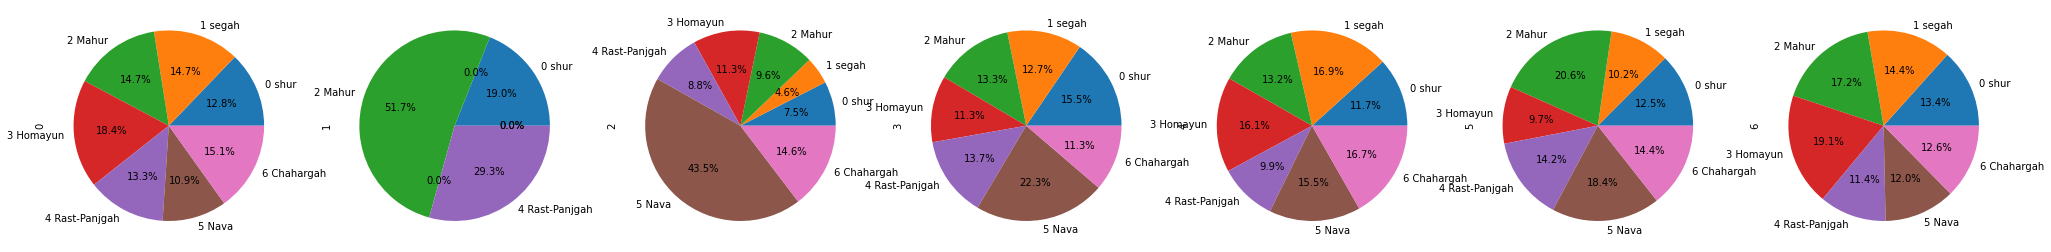

In [ ]:
run_cluster('KMeans', newDom, 7, 0, 2, 'dastgah')

KMEANS

For frequency features without PCA

7 clusters

inertia:  140575.95771807208
predict  actual
0        0         257
         1         281
         2         319
         3         363
         4         243
         5         237
         6         292
1        2           4
         4           9
2        0         261
         1         233
         2         249
         3         198
         4         242
         5         396
         6         201
3        0         152
         1         117
         2         228
         3         122
         4         148
         5         202
         6         183
4        0         322
         1         381
         2         361
         3         458
         4         285
         5         302
         6         331
5        0          11
         1           1
         2          30
         4          17
6        0          17
         1          13
         2          24
         3          29
         4          24
         5         103
         6          33
Name: actual

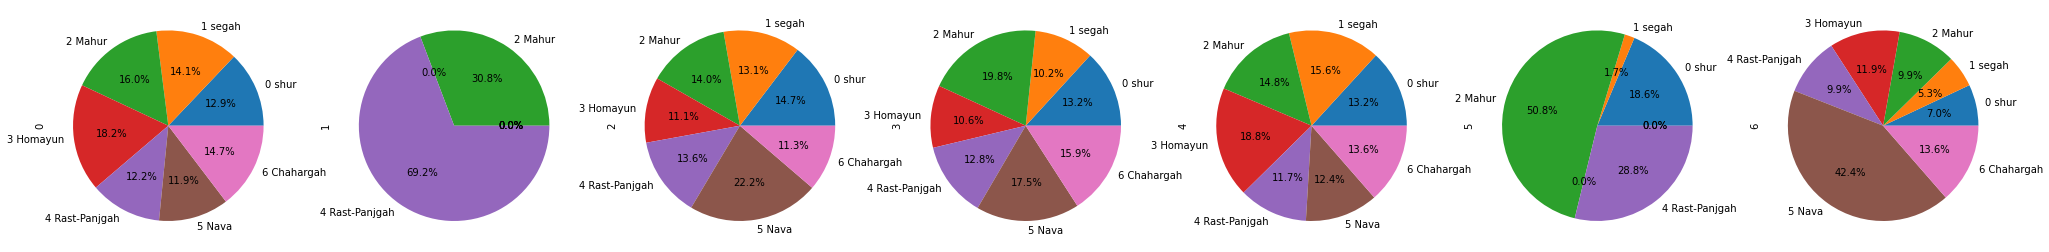

In [ ]:
run_cluster('KMeans', newDom, 7, 1, 2, 'dastgah')

KMEANS

For frequency features without PCA

20 clusters

inertia:  424834.3184218804
predict  actual
0        0          85
         1         132
         2          40
         3          89
         4          40
                  ... 
19       2          56
         3          38
         4          23
         5          67
         6          39
Name: actual, Length: 140, dtype: int64
silhouette score:  5.205907771564165


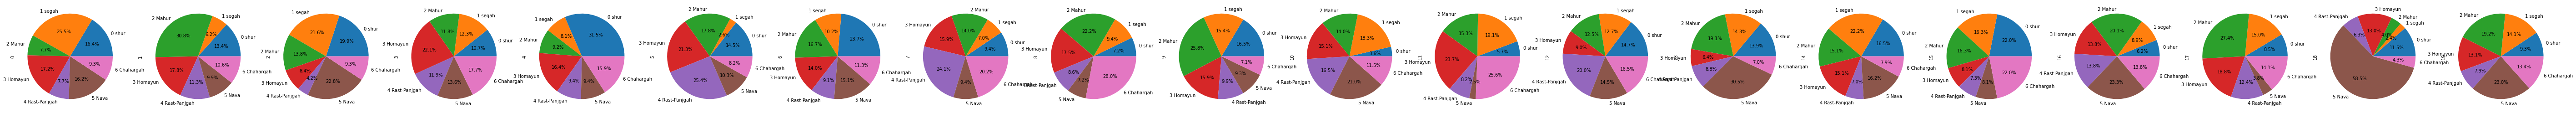

In [ ]:
run_cluster('KMeans', frq, 20, 0, 2, 'dastgah')

KMEANS

For frequency features with PCA

20 clusters

inertia:  10139.973816996422
predict  actual
0        0          79
         1          47
         2          89
         3          95
         4         121
                  ... 
19       2          97
         3          95
         4          88
         5          87
         6          90
Name: actual, Length: 139, dtype: int64
silhouette score:  32.143066278335084


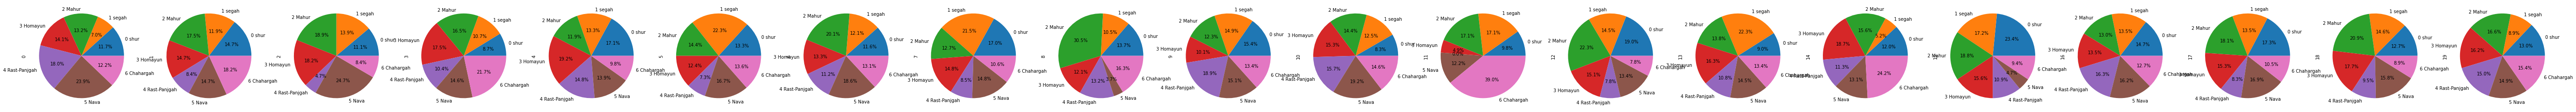

In [ ]:
run_cluster('KMeans', frq, 20, 1, 2, 'dastgah')

KMEANS

For domain features without PCA

20 clusters

inertia:  1624832.012682615
predict  actual
0        1           1
1        0         106
         1          89
         2          65
         3         133
                  ... 
16       5         151
         6          92
17       4           1
18       3           1
19       0          11
Name: actual, Length: 78, dtype: int64
silhouette score:  5.010735750270221


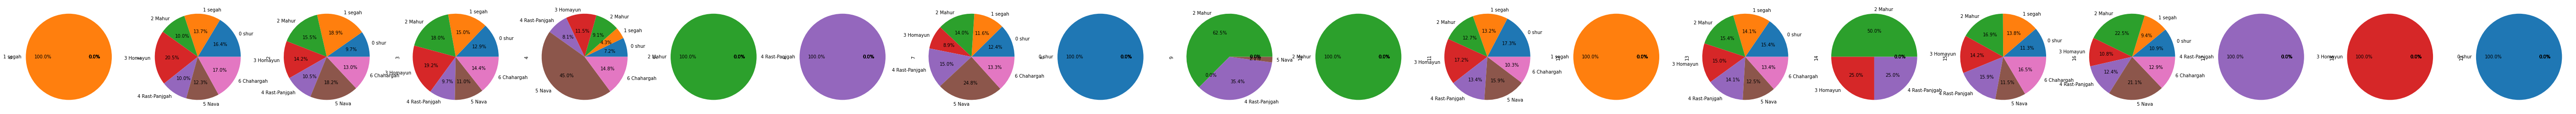

In [ ]:
run_cluster('KMeans', newDom, 20, 0, 2, 'dastgah')

KMEANS

For domain features with PCA

20 clusters

inertia:  29969.21396876991
predict  actual
0        0          90
         1          94
         2         112
         3         125
         4         119
                  ... 
19       2          95
         3          67
         4          93
         5          75
         6         124
Name: actual, Length: 104, dtype: int64
silhouette score:  44.444809694027285


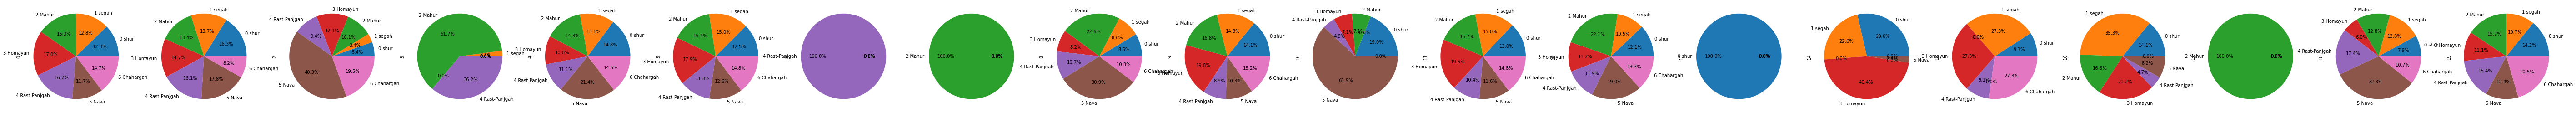

In [ ]:
run_cluster('KMeans', newDom, 20, 1, 2, 'dastgah')

# Agglomerative Clustering

predict  actual
0        0          963
         1          947
         2         1087
         3         1115
         4          934
         5         1223
         6          966
1        0           73
         1           86
         2          132
         3           63
         4           43
         5           33
         6           87
Name: actual, dtype: int64
silhouette score:  27.566856547328573


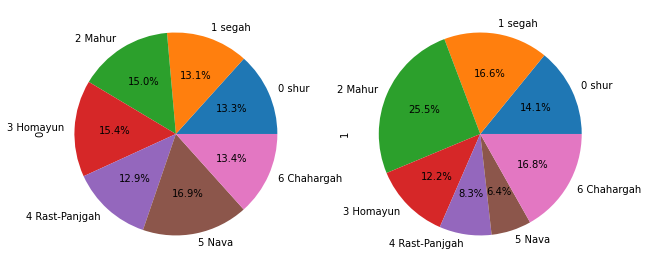

In [ ]:
run_cluster('agg', frq, 2, 0, 2, 'dastgah')

predict  actual
0        0         413
         1         525
         2         541
         3         457
         4         305
         5         499
         6         388
1        0         623
         1         508
         2         678
         3         721
         4         672
         5         757
         6         665
Name: actual, dtype: int64
silhouette score:  35.39558010314204


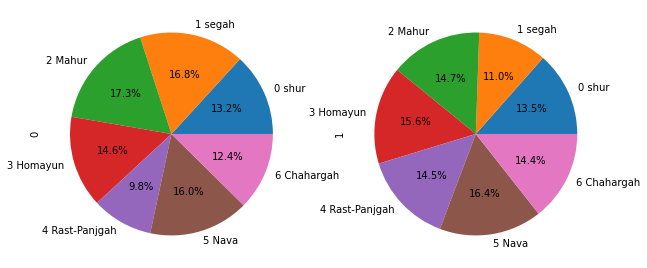

In [ ]:
run_cluster('agg', frq, 2, 1, 2, 'dastgah')

predict  actual
0        0         183
         1         133
         2         155
         3         171
         4          65
         5         291
         6         159
1        0         255
         1         148
         2         200
         3         340
         4         249
         5         214
         6         297
2        0         215
         1         301
         2         261
         3         223
         4         220
         5         450
         6         136
3        0          73
         1          86
         2         132
         3          63
         4          43
         5          33
         6          87
4        0          84
         1          59
         2         251
         3         127
         4         131
         5          58
         6         158
5        0         150
         1         173
         2         109
         3         116
         4         230
         5         148
         6         174
6        0        

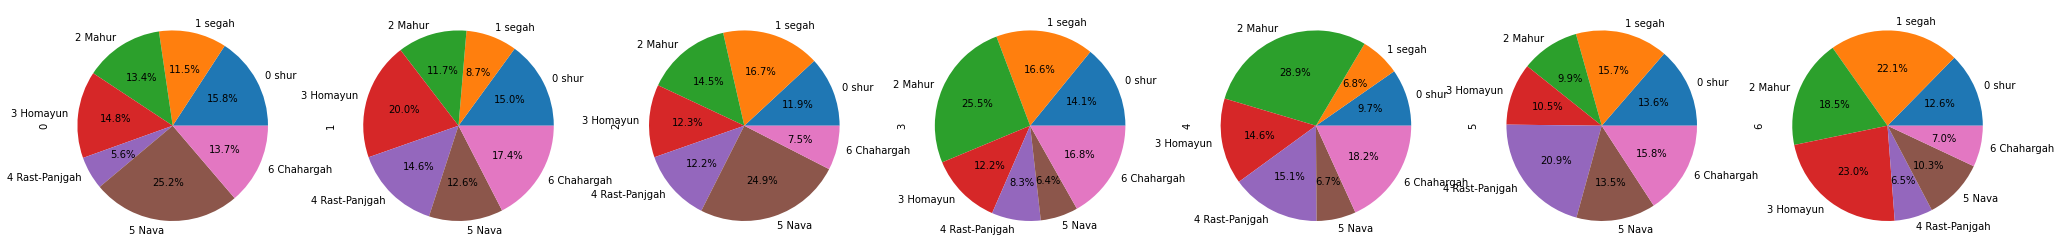

In [ ]:
run_cluster('agg', frq, 7, 0, 2, 'dastgah')

predict  actual
0        0         187
         1         281
         2         210
         3         212
         4         128
         5         210
         6         169
1        0         254
         1         216
         2         232
         3         271
         4         250
         5         285
         6         191
2        0          78
         1          69
         2          98
         3          59
         4          44
         5          42
         6          70
3        0         132
         1         101
         2         199
         3         205
         4         148
         5         153
         6         243
4        0         198
         1         189
         2         197
         3         191
         4         266
         5         287
         6         193
5        0          87
         1         104
         2         127
         3         105
         4          39
         5         127
         6          59
6        0        

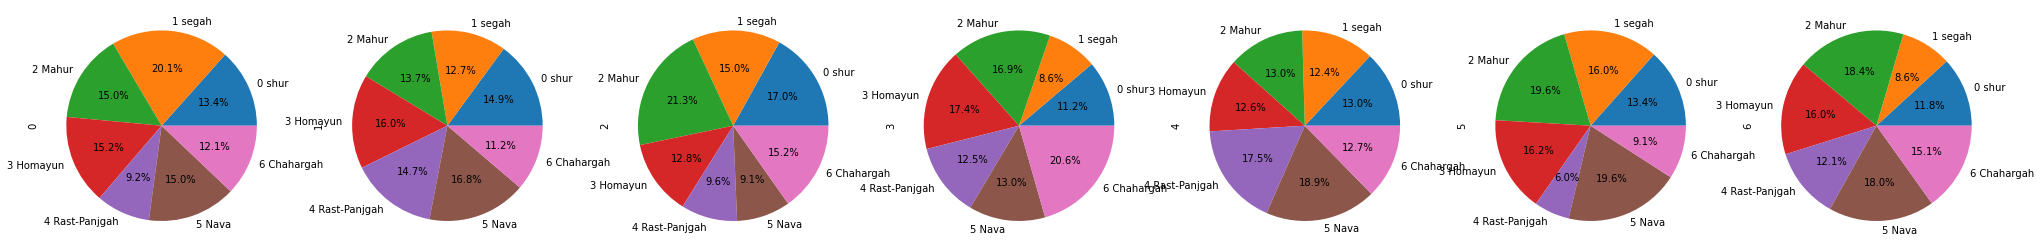

In [ ]:
run_cluster('agg', frq, 7, 1, 2, 'dastgah')

predict  actual
0        0          75
         1          63
         2         144
         3          86
         4          44
                  ... 
19       1          16
         2          46
         3          47
         5           2
         6          59
Name: actual, Length: 135, dtype: int64
silhouette score:  2.6680033628104094


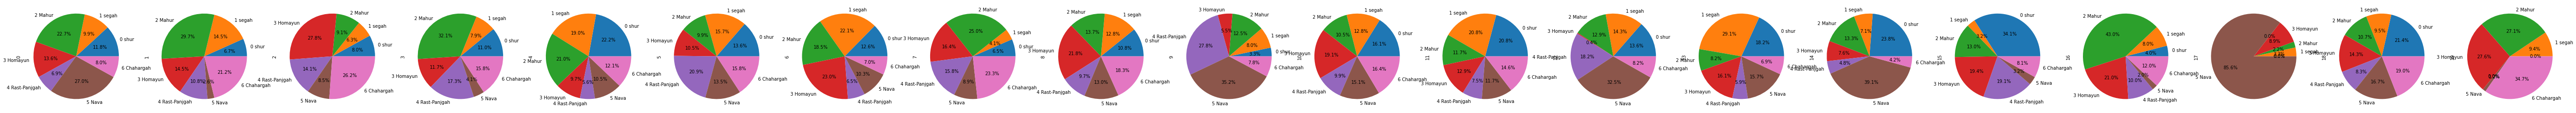

In [ ]:
run_cluster('agg', frq, 20, 0, 2, 'dastgah')

predict  actual
0        0         54
         1         56
         2         97
         3         74
         4         32
                   ..
19       2         19
         3         13
         4          5
         5          8
         6          2
Name: actual, Length: 138, dtype: int64
silhouette score:  25.159050180079795


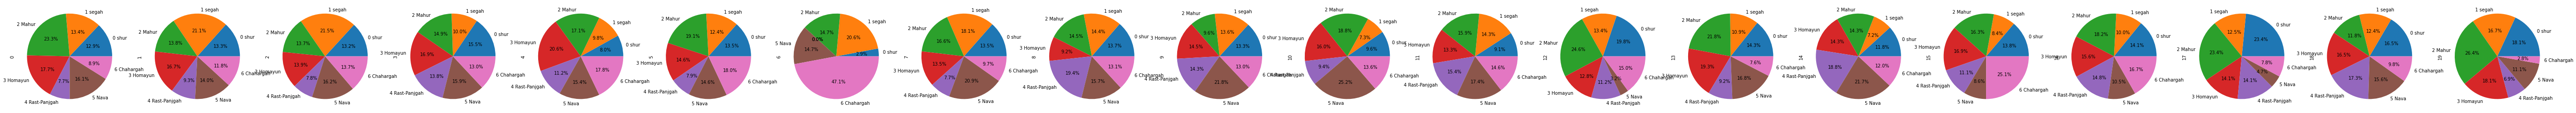

In [ ]:
run_cluster('agg', frq, 20, 1, 2, 'dastgah')

predict  actual
0        0         699
         1         709
         2         758
         3         813
         4         618
         5         804
         6         653
1        0         321
         1         317
         2         457
         3         357
         4         350
         5         436
         6         387
Name: actual, dtype: int64
silhouette score:  24.98311932515307


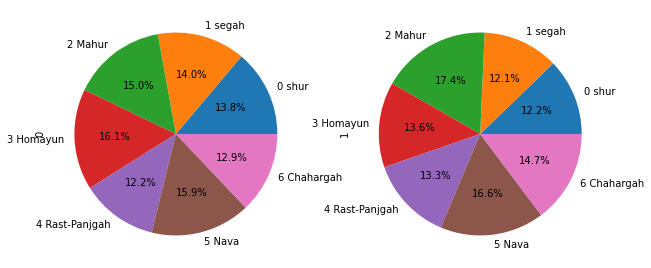

In [ ]:
run_cluster('agg', newDom, 2, 0, 2, 'dastgah')

predict  actual
0        0         785
         1         840
         2         873
         3         923
         4         684
         5         864
         6         749
1        0         235
         1         186
         2         342
         3         247
         4         284
         5         376
         6         291
Name: actual, dtype: int64
silhouette score:  52.88519229416357


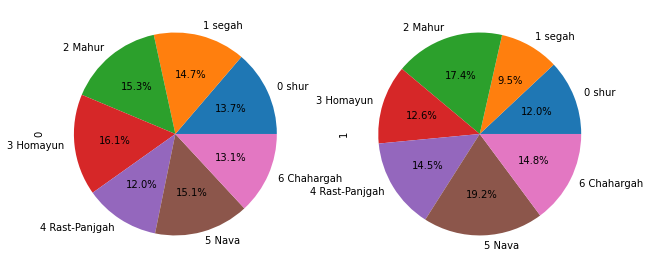

In [ ]:
run_cluster('agg', newDom, 2, 1, 2, 'dastgah')

predict  actual
0        0         453
         1         484
         2         540
         3         608
         4         405
         5         433
         6         458
1        0         282
         1         277
         2         366
         3         321
         4         292
         5         288
         6         320
2        0         246
         1         225
         2         218
         3         205
         4         213
         5         371
         6         195
3        0          28
         1          39
         2          57
         3          36
         4          31
         5         148
         6          67
4        0          11
         2          30
         4          17
5        1           1
6        2           4
         4          10
Name: actual, dtype: int64
Result: 1001 out of 7679 samples were correctly labeled.
silhouette score:  11.883912930122385


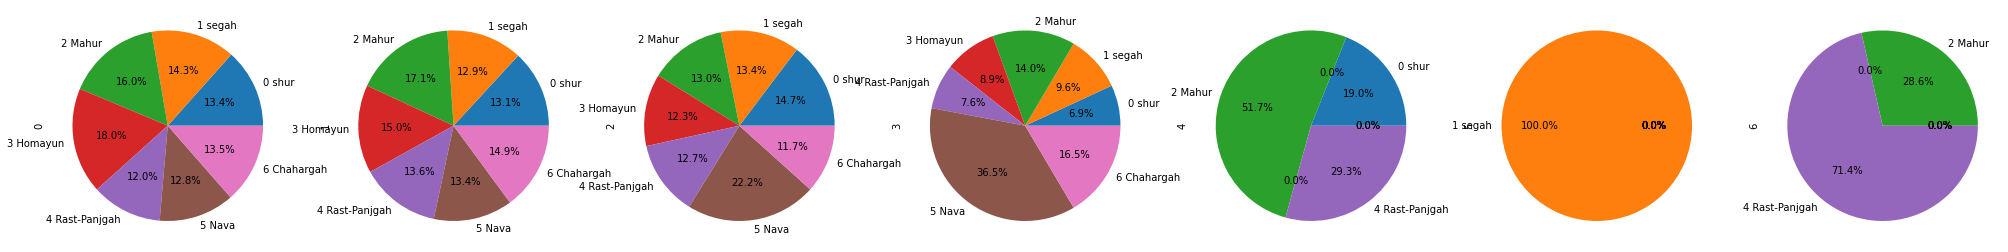

In [ ]:
run_cluster('agg', newDom, 7, 0, 2, 'dastgah')

predict  actual
0        0         307
         1         286
         2         288
         3         261
         4         282
         5         448
         6         224
1        0         209
         1         166
         2         297
         3         211
         4         242
         5         255
         6         258
2        2           4
         4          10
3        0          11
         1           1
         2          30
         4          17
4        0          26
         1          20
         2          41
         3          36
         4          32
         5         121
         6          33
5        0         330
         1         351
         2         390
         3         453
         4         270
         5         306
         6         350
6        0         137
         1         202
         2         165
         3         209
         4         115
         5         110
         6         175
Name: actual, dtype: int64
Result: 990 ou

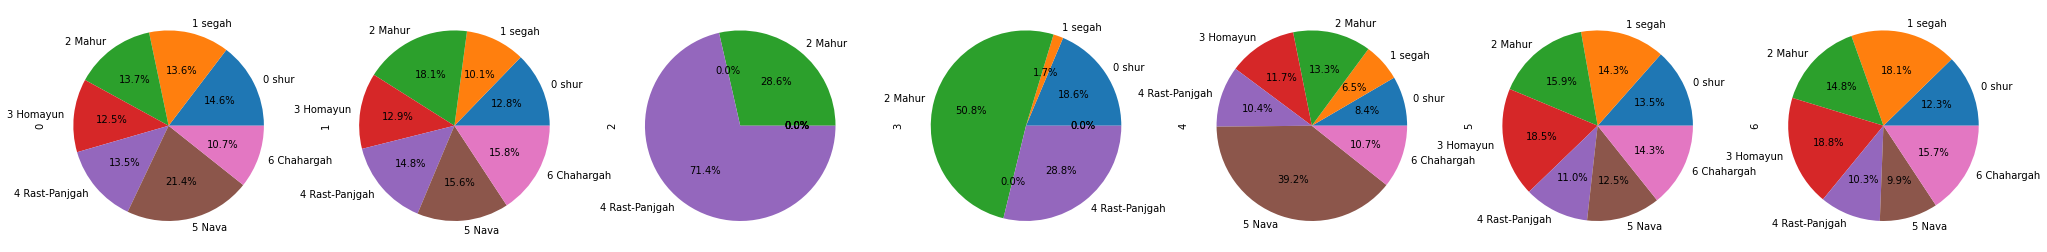

In [ ]:
run_cluster('agg', newDom, 7, 1, 2, 'dastgah')

predict  actual
0        0          11
         2          30
         4          17
1        0         114
         1         140
                  ... 
16       4           1
17       0           1
         6           1
18       2           1
19       5           1
Name: actual, Length: 84, dtype: int64
silhouette score:  1.9303978922844467


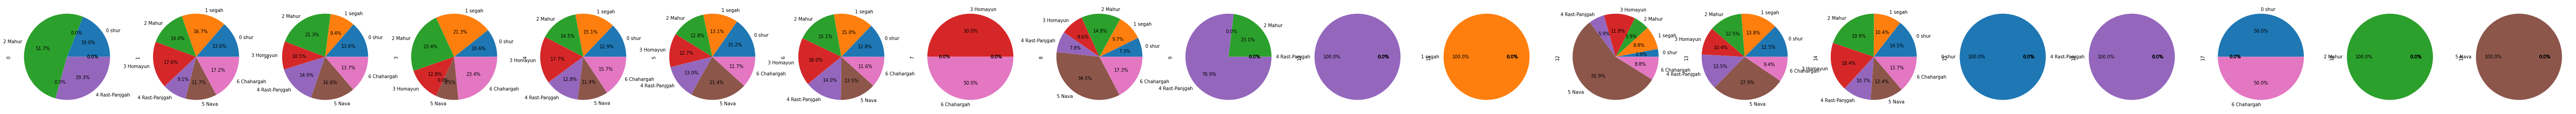

In [ ]:
run_cluster('agg', newDom, 20, 0, 2, 'dastgah')

predict  actual
0        0           1
         1           3
         2           2
         3           3
         4           2
                  ... 
18       3          97
         4         106
         5         122
         6          51
19       0          11
Name: actual, Length: 109, dtype: int64
silhouette score:  42.19606890611461


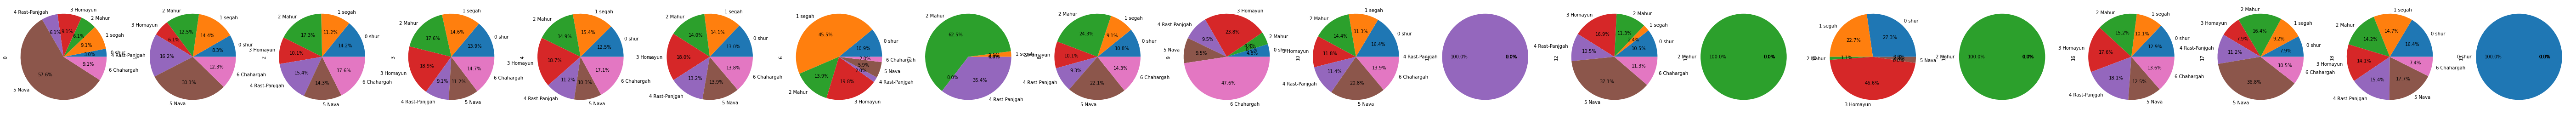

In [ ]:
run_cluster('agg', newDom, 20, 1, 2, 'dastgah')

 # Gaussian Mixture

predict  actual
0        0         673
         1         662
         2         672
         3         737
         4         692
         5         891
         6         661
1        0         363
         1         371
         2         547
         3         441
         4         285
         5         365
         6         392
Name: actual, dtype: int64
silhouette score:  11.863769114262228


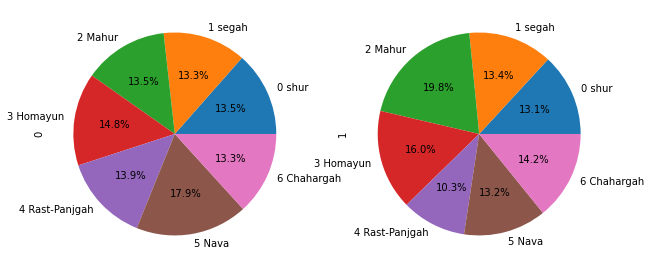

In [ ]:
run_cluster('GM', frq, 2, 0, 2, 'dastgah')

predict  actual
0        0          240
         1          267
         2          324
         3          257
         4          133
         5          243
         6          196
1        0          796
         1          766
         2          895
         3          921
         4          844
         5         1013
         6          857
Name: actual, dtype: int64
silhouette score:  46.401570527671424


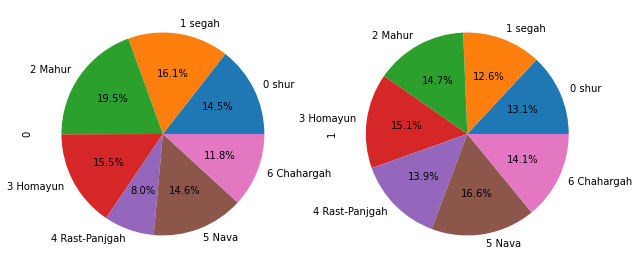

In [ ]:
run_cluster('GM', frq, 2, 1, 2, 'dastgah')

predict  actual
0        0         134
         1         158
         2         206
         3         174
         4          68
         5         185
         6         190
1        0         107
         1          88
         2         151
         3         151
         4         128
         5         165
         6         147
2        0         234
         1         274
         2          96
         3         206
         4         186
         5         315
         6         128
3        0         130
         1         148
         2         183
         3         201
         4         108
         5         172
         6          93
4        0         159
         1         196
         2         203
         3         178
         4         307
         5         271
         6         227
5        0         169
         1          99
         2         249
         3         204
         4         126
         5         120
         6         186
6        0        

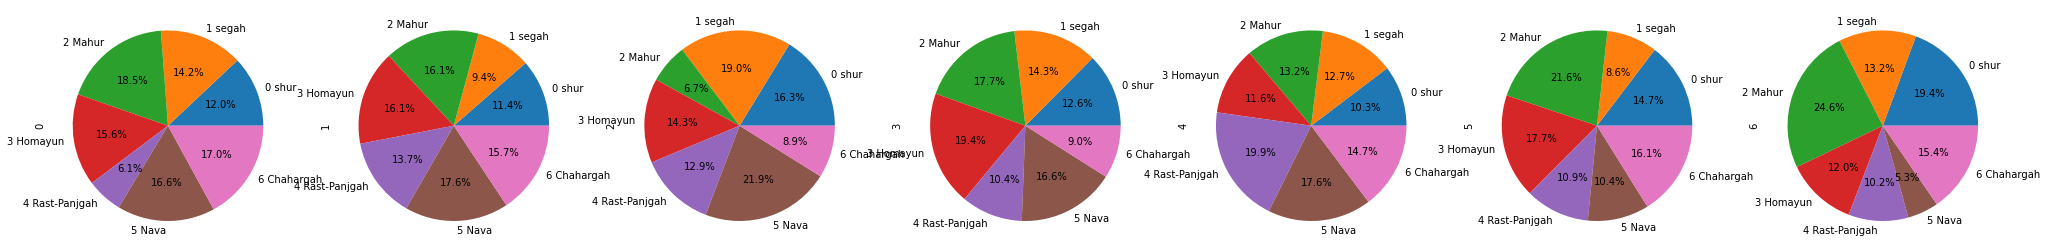

In [ ]:
run_cluster('GM', frq, 7, 0, 2, 'dastgah')

predict  actual
0        0          64
         1          64
         2         110
         3         112
         4          82
         5         106
         6         134
1        0         203
         1         164
         2         212
         3         243
         4         272
         5         332
         6         178
2        0          92
         1          99
         2         145
         3         116
         4          62
         5         121
         6          73
3        0         257
         1         290
         2         256
         3         286
         4         181
         5         261
         6         189
4        0         255
         1         224
         2         313
         3         277
         4         279
         5         288
         6         322
5        0          60
         1          46
         2          67
         3          37
         4          30
         5          18
         6          49
6        0        

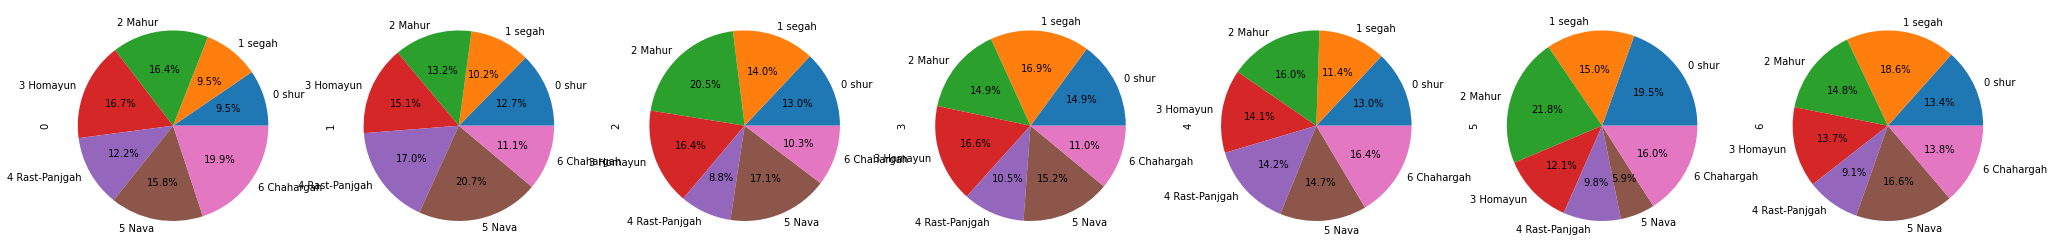

In [ ]:
run_cluster('GM', frq, 7, 1, 2, 'dastgah')

predict  actual
0        0         25
         1         25
         2         60
         3         50
         4         16
                   ..
19       2         66
         3         79
         4         21
         5         30
         6         70
Name: actual, Length: 135, dtype: int64
silhouette score:  3.566778103794404


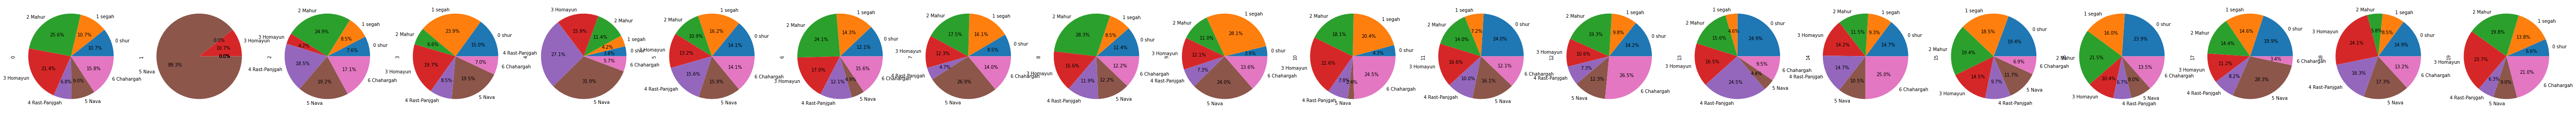

In [ ]:
run_cluster('GM', frq, 20, 0, 2, 'dastgah')

predict  actual
0        0          19
         1          14
         2          40
         3          36
         4          16
                  ... 
19       2          90
         3         126
         4          95
         5          96
         6          81
Name: actual, Length: 139, dtype: int64
silhouette score:  30.97209821365436


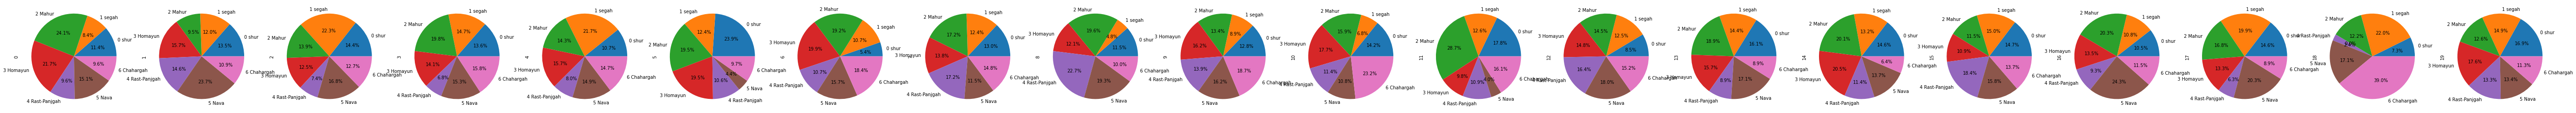

In [ ]:
run_cluster('GM', frq, 20, 1, 2, 'dastgah')

predict  actual
0        0          175
         1          196
         2          215
         3          178
         4          171
         5          247
         6          151
1        0          845
         1          830
         2         1000
         3          992
         4          797
         5          993
         6          889
Name: actual, dtype: int64
silhouette score:  22.339710563485617


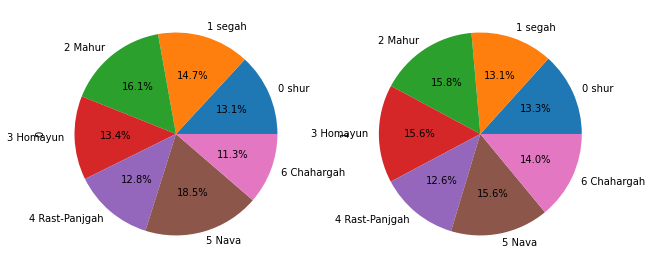

In [ ]:
run_cluster('GM', newDom, 2, 0, 2, 'dastgah')

predict  actual
0        0          938
         1          873
         2         1125
         3         1070
         4          927
         5         1131
         6          975
1        0           82
         1          153
         2           90
         3          100
         4           41
         5          109
         6           65
Name: actual, dtype: int64
silhouette score:  36.17630467258157


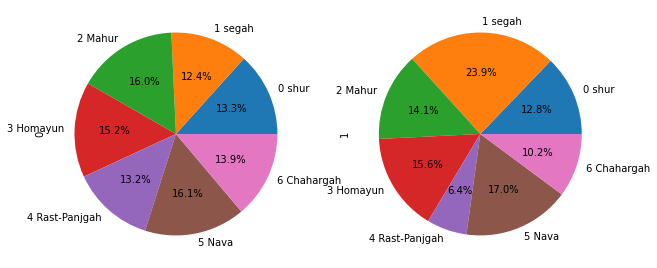

In [ ]:
run_cluster('GM', newDom, 2, 1, 2, 'dastgah')

predict  actual
0        0          65
         1         113
         2          98
         3          85
         4          68
         5         136
         6          77
1        0         163
         1         112
         2         250
         3         138
         4         126
         5         191
         6         126
2        0          69
         1          69
         2          91
         3          43
         4          68
         5         144
         6          48
3        0          18
         1          11
         2          23
         3          27
         4          21
         5         104
         6          35
4        0         216
         1         251
         2         220
         3         261
         4         220
         5         278
         6         247
5        0         394
         1         386
         2         472
         3         526
         4         397
         5         319
         6         417
6        0        

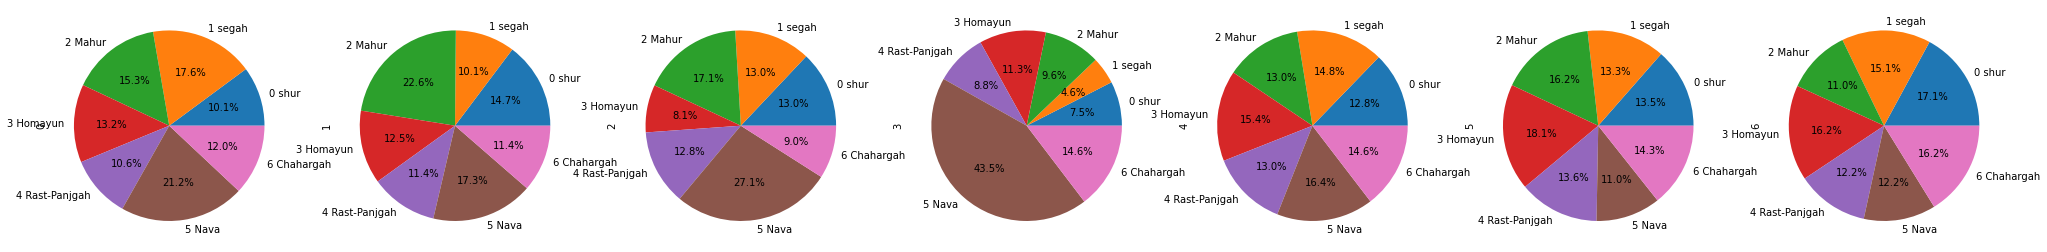

In [ ]:
run_cluster('GM', newDom, 7, 0, 2, 'dastgah')

predict  actual
0        0          24
         1          76
         2          90
         3          40
         4          46
         5          70
         6          45
1        0         139
         1         120
         2         211
         3         109
         4         153
         5         223
         6         187
2        0         187
         1         262
         2         264
         3         337
         4         240
         5         183
         6         303
3        0          56
         1          97
         2          69
         3          73
         4          35
         5          36
         6          13
4        0          39
         1          28
         2          32
         3          50
         4          14
         5          96
         6          43
5        0         575
         1         443
         2         545
         3         561
         4         480
         5         632
         6         449
6        2        

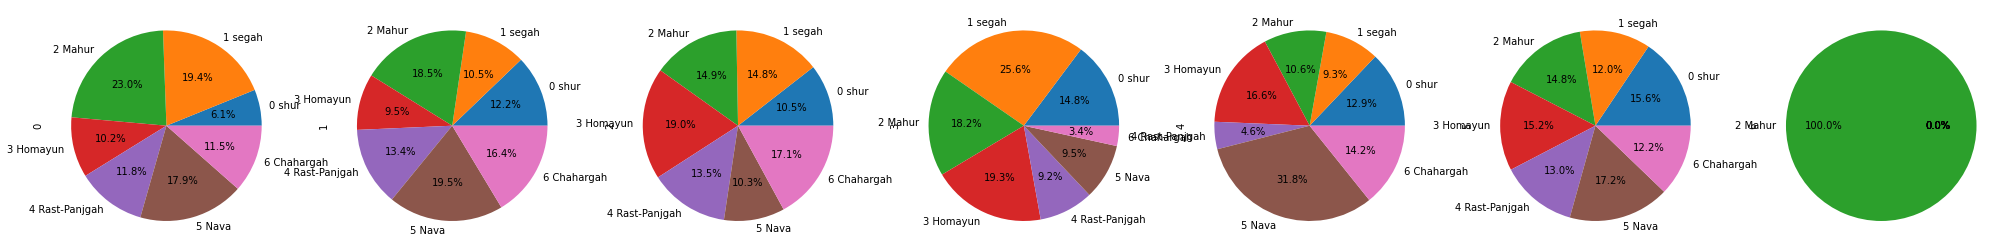

In [ ]:
run_cluster('GM', newDom, 7, 1, 2, 'dastgah')

predict  actual
0        1           1
1        0         112
         1          93
         2          68
         3         111
                  ... 
16       5         124
         6          61
17       4           1
18       3           1
19       0          11
Name: actual, Length: 78, dtype: int64
silhouette score:  2.8732589928094985


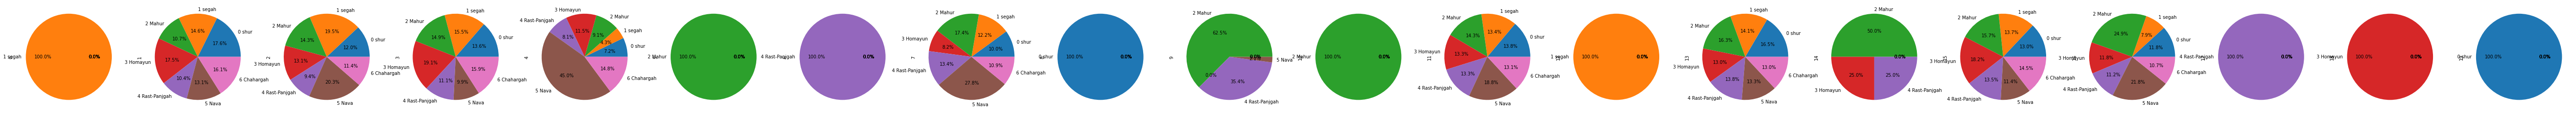

In [ ]:
run_cluster('GM', newDom, 20, 0, 2, 'dastgah')

predict  actual
0        0         235
         1         123
         2         153
         3         163
         4         175
                  ... 
18       6          27
19       0          18
         1          15
         3          38
         5           2
Name: actual, Length: 111, dtype: int64
silhouette score:  22.768137586093356


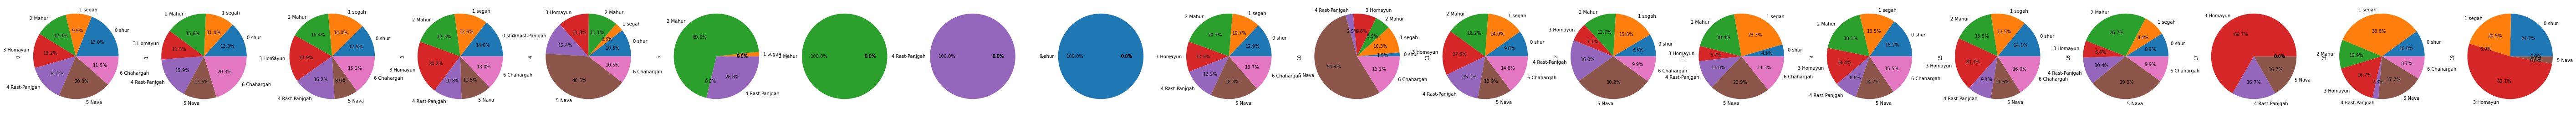

In [ ]:
run_cluster('GM', newDom, 20, 1, 2, 'dastgah')